# Введение

В данном проекте я изучу выдвинутые гипотезы по увеличению выручки интернет-магазина.

Проведу приоритезацию гипотез, запущу A/B тесты и проанализирую результаты. 



# Приоритезация гипотез

## Импорт данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') #помещаем данные файла о гипотезах в переменную

In [4]:
display(hypothesis)
display(pd.unique(hypothesis['Hypothesis']))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

## Обработка данных


Приведу названия столбцов к нижнему регистру

In [5]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]

Проведем приоритезацию гипотез с помощью двух методов: ICE и RICE

## ICE

In [6]:
hypothesis['ice_score'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)

In [7]:
ice_score = hypothesis.iloc [:, [0,5]]


In [8]:
ice_score.sort_values(by = 'ice_score', ascending=False)

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Три наиболее популярные гипотезы в соответствии с данной оценкой - это 8,0,7. 

- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


## RICE

In [9]:
hypothesis['rice_score'] = round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)

In [10]:
rice_score = hypothesis.iloc [:, [0,6]]


In [11]:
rice_score.sort_values(by = 'rice_score', ascending=False)

,hypothesis,rice_score
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


В соответствии с методом RICE первые места занимают следующие гипотезы 7,2,0,6:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**Вывод** - 

Рейтинги гипотез различны по причине разного охвата пользователей

На мой взгляд, гипотеза номер 7 является приоритетной из всех:

- во-первых, она находится в топе при двух методах оценки
- во-вторых, рейтинг по методу RICE более чем в 2 раза выше остальных гипотез - значит, данная гипотеза охватит больше потенциальных клиентов (показатель Reach самый высокий из всех).

# Анализ A/B-теста

In [12]:
orders = pd.read_csv('/datasets/orders.csv') # импорт данных
visitors = pd.read_csv('/datasets/visitors.csv') # импорт данных

Проверяю данные на отсутствующие значения, правильность заголовков, наличие дубликатов

In [13]:
display(orders.info())
display(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

0

In [14]:
display(visitors.info())
display(visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

0

Изменяю формат даты на верный

In [15]:
orders['date']= pd.to_datetime(orders['date'])

In [16]:
visitors['date']= pd.to_datetime(visitors['date'])

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Подготовка данных для дальнейших действий и графиков.** 

In [18]:
#создание уникальных пар "дата-группа"
datesGroups = orders[['date','group']].drop_duplicates() 

In [19]:
# создаю агрегированные и кумулятивные данные по заказам
ordersAggregated  = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max','transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:

# создаю агрегированные и кумулятивные данные по посещениям
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 


In [21]:
# объединяю данные методом merge

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
 

In [22]:
# изменяю названия колонок
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [23]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [24]:
# кум выручка по группе А

cumulativeRevenueA  = cumulativeData[cumulativeData['group']=='A'][['date','orders', 'revenue']]

In [25]:

# кум выручка по группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','orders', 'revenue']]

<div class="alert alert-info"> проверка на пересечения</div>


In [41]:
freqUsers=orders.groupby('visitorId', as_index=False)[['group']].nunique().sort_values(by='group',ascending=False).query('group>1')

In [42]:
len(freqUsers)

58

Далее я создаю таблицу с теми пользователями, которые имеют только одну группу 9не входят в число пользователей с двумя группами).

In [43]:
clearedOrders=orders[
            np.logical_not(orders['visitorId'].isin(freqUsers['visitorId']))
        ]

Проверка на пересечения

In [45]:
check = pd.merge(freqUsers, clearedOrders, how='inner', on=['visitorId'])


In [46]:
check

,visitorId,group_x,transactionId,date,revenue,group_y


 **График кумуллятивной выручки по группам**

Text(0.5, 0, 'Дата')

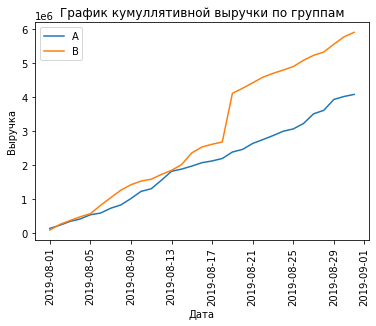

In [31]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.xticks(rotation=90)
plt.title('График кумуллятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")

**Вывод** - 

график демострирует, что показатели кумулятивной выручки группы В превышают группу А и выручка изо дня в день обеих групп растет.

18-19.08 произошел довольно крупный заказ в группе В и кумулятивная выручка сильно подскочила.

в целом, графики показывают одниковый тренд и угол наклона прямых (за исключением дня, когда был оформлен крупный заказ). После данного заказа прямые остались параллельными.

 **График кумуллятивного среднего чека по группам**

Теперь можно построить графики кумулятивного среднего чека по группам.

Text(0.5, 0, 'Дата')

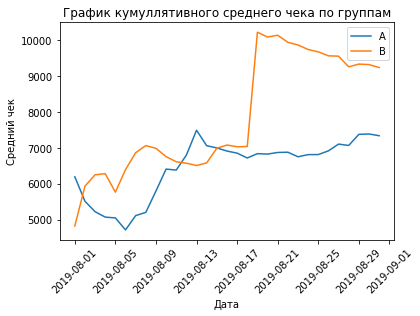

In [32]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xticks(rotation=45)
plt.title('График кумуллятивного среднего чека по группам')
plt.ylabel("Средний чек")
plt.xlabel("Дата")

**Выводы**

таким образом, в группе А первые 6 дней снижался, затем стал расти, своего пика достиг 13.08. ЗАтем немного снизился и к концу теста достиг прежнего пикового уровня.

в группе В же средний чек в целом с начала теста вырос почти в 2 раза, Вероятно, это произошло из за крупного заказа 18-19 августа, что сильно увеличило значение среднего чека по группе. 

После крупной покупки значение стало уменьшаться

к концу теста значение среднего чека группы В больше группы А на 2 тр

Но делать какие либо определенные выводы нельзя. тк как видно явное влияение крупного заказа на данные


**График относительного изменения кумулятивного среднего чека группы B к группе A.**

Text(0.5, 0, 'Дата')

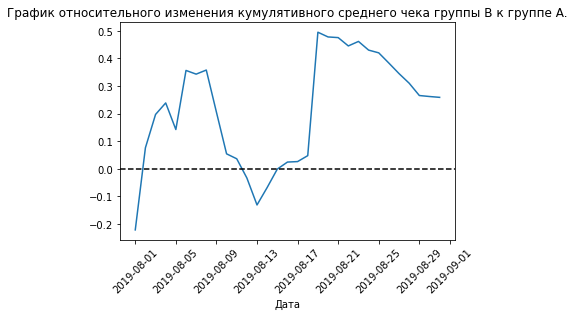

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#  отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляю ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel("Дата")

**Выводы**

 в целом, на протяжении всего теста относительное различие для среднего чека у группы В было больше, чем у группы А, за исключением провала в конце второй недели теста. 
 
 после 18 августа произошел резкий рост относительной разницы между ср. чеками, опять же - это произошло из-за выброса (очень крупного заказа)
 
 после чего относиельное различие между чеками стало сокращаться.

**График кумулятивного среднего количества заказов на посетителя по группам (конверсия)**

Text(0.5, 0, 'Дата')

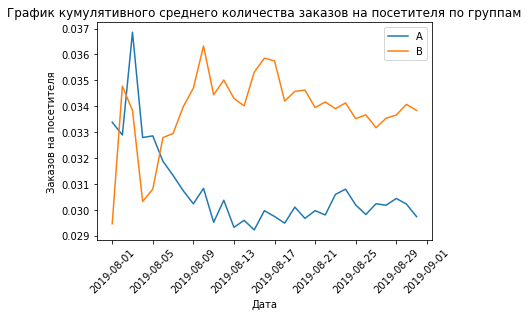

In [34]:
# расчет кум. конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# данные по группе А
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#  графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel("Заказов на посетителя")
plt.xlabel("Дата")


**Выводы**

после недели теста конверсия группы В стала стабильно выше группы А, причем разница существенная. 

стоит отметить, что конверсии обеих групп имеют колебания 

кумулятивная коверсия к концу теста для группы В составила 0,034 , а для группы А - 0,03

Это может предварительно служит признаком успешности проведения теста.

**График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

Text(0.5, 0, 'Дата')

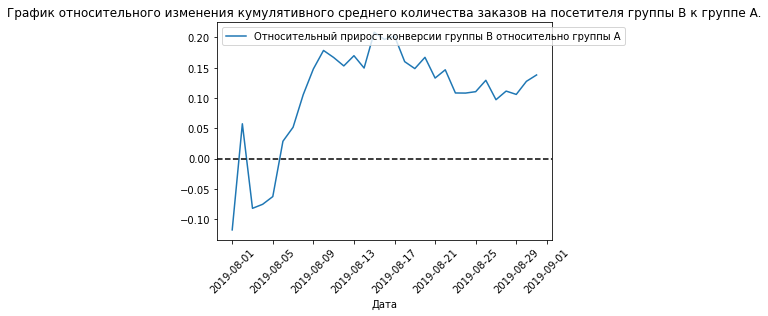

In [35]:
# объединяю данные по конверсии двух групп

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend(loc="upper left")

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')

plt.xlabel("Дата")

**Выводы**

после первой недели теста группа В по показателям конверсии стабильно стала обгонять группу А. До 17 августа разница в относительном приросте конверсии группы В относительно г.А только увеличивалась.

После разница стала сокращаться, но к концу тест конверсия группы В осталась выше группы А на 15%

ТАкже сильное изменение в показателях стали наблюдаться в период с 3 августа по 10 августа. Данный период теста сильно повлиял на данные.


**точечный график количества заказов по пользователям**

In [36]:
# таблицы с заказами на пользователя методом groupby

ordersByUsers = orders.groupby('visitorId', as_index=False)['transactionId'].count()

ordersByUsers.columns=['visitorId', 'orders']

Text(0, 0.5, 'Заказов на пользователя')

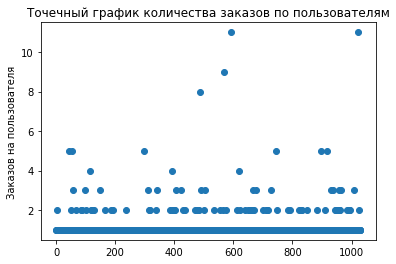

In [37]:
# график
plt.scatter(pd.Series(range(0,len(ordersByUsers))), ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel("Заказов на пользователя")


По графику видно, что большиноство пользователей совершило 1-2 заказа. Пользователей, совершивших 3 и более заказов не так много.

**95-й и 99-й перцентили количества заказов на пользователя**

In [38]:
np.percentile(ordersByUsers['orders'], [95, 99])


array([2., 4.])

Таким образом, 95% пользователей совершило не более 2 заказов, а 99% пользователей совершило не более 4 заказов.

ПОлучается всего около 4% пользователей совершили 3-4 заказа.

За верхнюю границу числа заказов буду считать 2 заказа.

**точечный график стоимостей заказов.**

Text(0, 0.5, 'Стоимость заказа, млн')

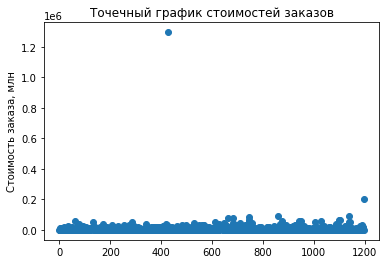

In [39]:
# график
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel("Стоимость заказа, млн")

Из графика видно, что есть два выброса - заказы стоимостью 200 тр, и более 1,2 млн. За границу аномальных заказов можно взять метку от 150 тр.

**95-й и 99-й перцентили стоимости заказов**

In [40]:
np.percentile(orders['revenue'], [95, 99])


array([28000. , 58233.2])

95% заказов стоимостью до 28 тр, 99% заказов стоимостью до 58,2 тр

Верхнюю границу стоимости заказов определим на отметке 30000, таким образом из данных уберется менее 5%

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

***Формулировка гипотез***

Ho - различий в среднем количестве заказов между группами нет. 

H1 -  различия в среднем между группами есть.

Опеределим сколько заказов было на одного пользователя в разных группах



In [41]:
# группа А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False)['transactionId'].count()
ordersByUsersA.columns = ['visitorId', 'orders']

In [42]:
# группа В
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False)['transactionId'].count()
ordersByUsersB.columns = ['visitorId', 'orders']

Аналогично с посетителями

In [43]:
visitorsPerDateA = visitors[visitors['group']=='A'][['date', 'visitors']]


In [44]:
visitorsPerDateB = visitors[visitors['group']=='B'][['date', 'visitors']]


Подготовлю выборку к проверки критерием Манна-Уитни.

Создам две переменные `sampleA` и `sampleB`, где пользователям, которые что то купили, будет соотвествовать число заказов. А не купившим пользователям - нули.

In [45]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsPerDateA['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsPerDateB['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [46]:
import scipy.stats as stats

print('p-value: ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительно изменение числа заказов на пользователя: ',  "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value:  0.017
Относительно изменение числа заказов на пользователя:  0.138


**Вывод**

по сырым данным наблюдаются различия  в среднем числе заказов групп A и B

p-value = 0.017 меньше 0.05.

Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, вправе отвергнуть.

Также стоит отметить, относительный выигрыш группы В составил 13,8% в отношении группы А

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [47]:
print('p-value: ','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительно изменение среднего чека: ','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:  0.729
Относительно изменение среднего чека:  0.259


**Выводы**

P-value больше 0.05. 

Оснований отвегнуть нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

относительное различие между группами составляет 25,9%

Данные противоречат, стоит очистить данные и проанализировать показатели на данных без выбросов

До этого за аномальные значения я взял -

- стоимость заказов от 30тр
- количество заказов на пользователя от 3 и более.

**Очистка данных**

In [48]:
# определяю сколько аномальных пользователей в данных
# конкатенирую данные из двух групп с большим кол-вом заказов и большой выручкой.
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


Таким образом, из всех данных всего 74 пользователей - аномальные. Это составляет меньше 1% из всех пользователей двух групп

In [49]:
print(round(74/len(pd.concat([sampleA, sampleB], axis=0))*100,2))

0.2


**Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным**

<div class="alert alert-info"> Напомню гипотезы

Ho - различий в среднем количестве заказов между группами по очищенным данным нет. 

H1 -  различия в среднем между группами по очищенным данным  есть.</div>




In [50]:
# стат значимость по филттрованным данным, 
#исключаю тех пользователей, чей ID в аномальных данных 

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateA['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [51]:
print('p-value: ','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительно изменение числа заказов на пользователя: ','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value:  0.008
Относительно изменение числа заказов на пользователя:  0.184


Вывод остается тот же, что и на сырых данных. Есть различия между средним числом заказов на пользователя в двух группах.

Также относительный прирост увеличился (было 13,8%, стало 18,3%)

**статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

<div class="alert alert-info">Напомню гипотезы

Нулевая гипотеза: различий в среднем чеке между группами по очищенным данным  нет.

Альтернативная гипотеза: различия в среднем чеке между группами по очищенным данным  есть.</div>

In [52]:
print('p-value: ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительно изменение среднего чека: ',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:  0.738
Относительно изменение среднего чека:  -0.020


P-value почти не изменился, а вот разница в среднем чеке стала практически отсутствовать (напомню, на сырых данных, разница в среднем чеке составляла 25% в пользу группы В).

Теперь же она практически отсуствует (чуть меньше чем в группе А)

ТАким образом, нулевую гипотезу (различий в среднем чеке между группами нет) относительно среднего чека отвегнуть не можем

<div class="alert alert-info">Таким образом, теперь по очищенным данным противоречий не наблюдается. 
    
P-value > alpha, что <b>не позволяет отвергнуть</b> нулевую гипотезу о том, что различий в среднем чеке между группами по очищенным данным нет.
    
Это подтверждает и относильное отличие средних чеков по очищенным данным.
</div>

**Обобщение выводов относительно теста**

- и по сырым и по очищенным данным есть статистически значимое различие между средним числом заказов на одного пользователя между группами

- по сырым данным анализ показал, что статистически значимое различие между средним чеком двух групп отсутсвует. Однако относительный прирост по сырым данным показал значение +25% у группы В относительно группы А по среднему чеку. По очищенным данным данное противоречие ликвидировалось - изменение среднего чека минимально.


то есть в целом каждый пользователь начал совершать больше заказов, но стал покупать более дешевые вещи.



**Вывод**

цель тестирования была увеличить выручку.
Данная цель успешно достигнута. ПОльзователи группы В принесли компании на 1,9 млн больше группы А.

Хотя стоит помнить, что в группу B попали 2 аномальных заказа (200 т у.е. и 1,2 млн).

Таким образом, если не считать их, то выручка группы В больше на 33 т у.е. группы А. 

В целом, увеличение выручки произошло на 8%

Такой важный показатель, как средний чек по результатам тестирования не изменился, однако изменения привлекли большее количество покупателей, что показывают графики конверсии.

Оснований считать тест провальным не вижу, так как основная цель - увеличение выручки - достигнута. Тест можно закончить и приступить к тестированию новых разработок.



In [53]:
print('Выручка в группе А:', orders.query('group =="A" &  revenue < 200000')['revenue'].sum())

Выручка в группе А: 4084803


In [54]:
print('Выручка в группе B:',orders.query('group =="B" &  revenue < 200000')['revenue'].sum())

Выручка в группе B: 4410520


In [55]:
print('Темп прироста выручки:', round(orders.query('group =="B" &  revenue < 200000')['revenue'].sum()/orders.query('group =="A" &  revenue < 200000')['revenue'].sum()*100-100,2))

Темп прироста выручки: 7.97


# Заключение

Таким образом, в ходе исследования были приоретизированы выдвинутые гипотезы.

Был проведен анализ А/В теста, сделаны выводы и рекомендации относительно его продолжения/завершения.

Тест считаю успешным.



*единственное, я не понял, каких из гипотез тестировалась, чтобы сделать вывод относительно нее..*

*были выдвинуты гипотезы, поставили им приоритеты - то  есть вырали какая важнее и какую будем тестировать.*

Я предположил, что самая опитимальная - это гипотеза 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), так как она находится в двух рейтингах и охватывает большее число клиентов.

если считать, что тестировали ее, то в целом складывается, что эти рассылки и позволили увеличить число заказов на пользователя.